In [1]:
# 欠拟合现象
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
plt.rcParams['font.family'] = 'AR PL UKai CN'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

x = np.linspace(0, 10, 50)
y= x * np.sin(x)
X = x[:, np.newaxis]
lr = LinearRegression()
lr.fit(X, y)
plt.scatter(x, y, c='g', label='样本数据')
plt.plot(X, lr.predict(X), 'r-', label='拟合线')
plt.legend()
plt.title(f"$R^2$:{lr.score(X, y):.3f}")

Text(0.5, 1.0, '$R^2$:0.059')

In [2]:
#  多项式拓展
from sklearn.preprocessing import PolynomialFeatures
X = np.array([[1, 2],[3, 4]])
# degree: 扩展的阶数， 阶数越高则输出特征越多.
# include_bias：是否包含偏执。 默认为True
              
poly = PolynomialFeatures(2, include_bias=True)

r = poly.fit_transform(X)
print("转换之后的结果:")
print(r)
print("指数矩阵:")
print(poly.powers_)
print("输入的特征数量:", poly.n_input_features_)
print("输出的特征数量:", poly.n_output_features_)
for x1, x2 in X:
    for e1, e2 in poly.powers_:
        print(x1 ** e1 * x2 ** e2, end='\t')
    print()
        
        

转换之后的结果:
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
指数矩阵:
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]
输入的特征数量: 2
输出的特征数量: 6
1	1	2	1	2	4	
1	3	4	9	12	16	


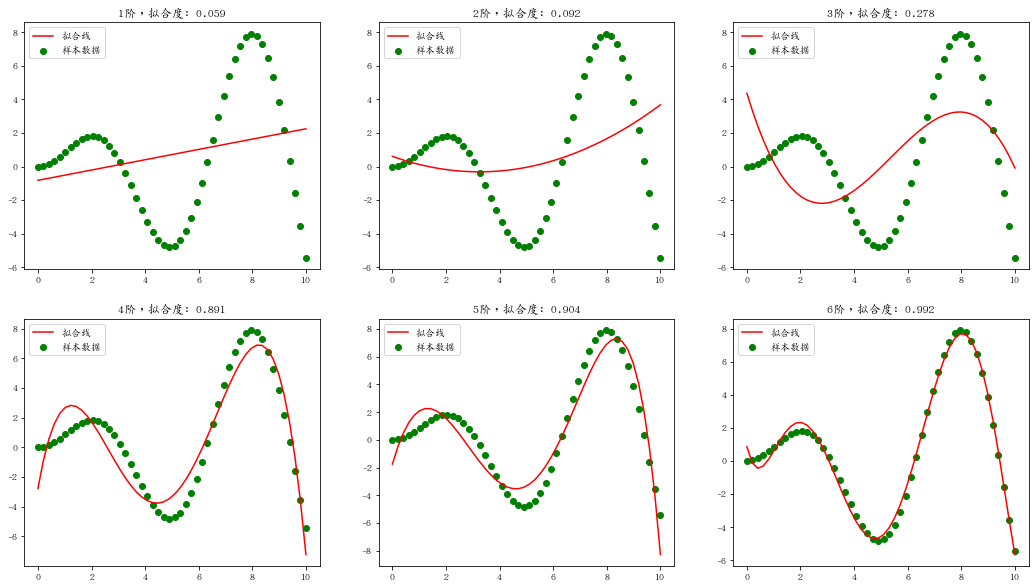

In [3]:
# 解决欠拟合
x = np.linspace(0, 10, 50)
y = x * np.sin(x)
X = x[:, np.newaxis]
figure, ax = plt.subplots(2, 3)
figure.set_size_inches(18, 10)
ax = ax.ravel()
# 进行1 ～ 6 阶的多项式展开
for  n in range(1, 7):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_transform = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_transform, y)
    ax[n - 1].set_title(f"{n}阶，拟合度: {lr.score(X_transform, y):.3f}")
    ax[n - 1].scatter(x, y, c='g', label='样本数据')
    ax[n - 1].plot(x, lr.predict(X_transform), 'r-', label='拟合线')
    ax[n - 1].legend()

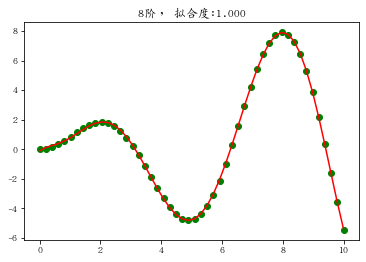

In [4]:
# 流水线
from sklearn.pipeline import Pipeline
x = np.linspace(0, 10, 50)
y = x * np.sin(x)
X = x[:, np.newaxis]
# 定义流水线的 buzhu 类型为一个列表，列表中的每一个元素是元组类型
# 格式为: [(name1, class1), (name2, class2), .... ,(name_N, calss_N)]
steps = [('poly', PolynomialFeatures(include_bias=False)), ('lr', LinearRegression())]
pipe = Pipeline(steps=steps)
# 设置流水线的参数，所有可用的参数， 可以通过 pipline.get_params() 获取
pipe.set_params(poly__degree=8)
pipe.fit(X, y)
score = pipe.score(X, y)
plt.title(f"8阶， 拟合度:{score:.3f}")
plt.scatter(X, y, c='g', label='样本数据')
plt.plot(X, pipe.predict(X), 'r-',label="拟合线")

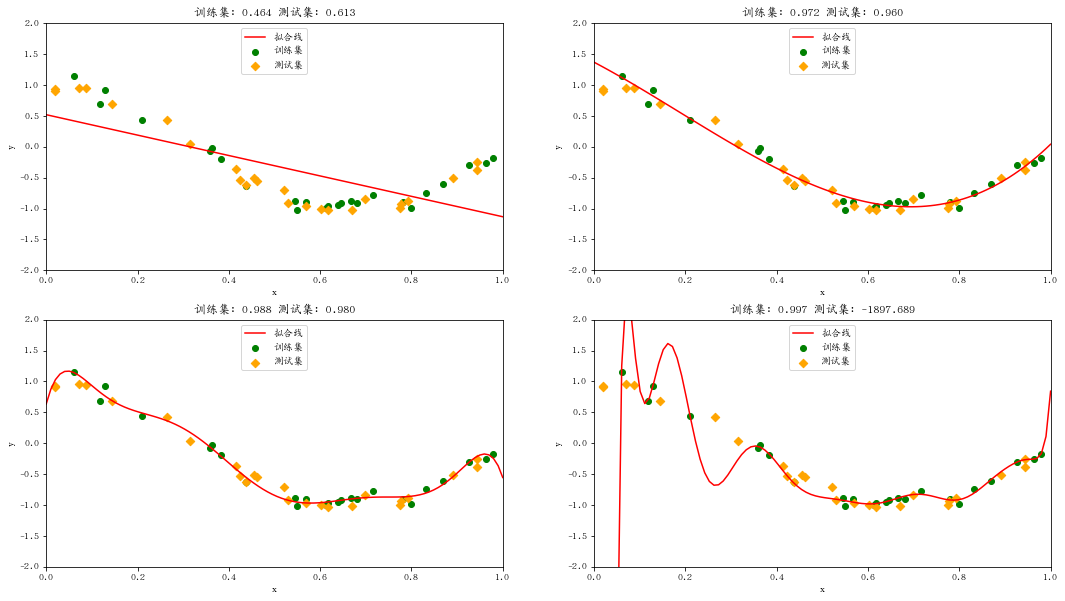

In [18]:
# 过拟合现象
from sklearn.model_selection import train_test_split
# 定义数据分布的函数(由X->y的映射函数)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# 定义训练与绘图函数，后面可重复使用
def fit_and_plot(model):
    np.random.seed(0)
    x = np.random.rand(50)
    # 在映射函数上，增加一定的误差(噪声)。这样更符合显示中数据的分布。
    # 误差服从正态分布
    y = true_fun(x) + np.random.randn(len(x)) * 0.1
    # 把数据转换为一维数组
    X = x[:, np.newaxis]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    plt.scatter(X_train, y_train, c='g', label='训练集')
    plt.scatter(X_test, y_test, c='orange', marker='D', label='测试集')
    s = np.linspace(0, 1, 100).reshape(-1, 1)
    plt.plot(s, model.predict(s), c='r', label="拟合线")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend(loc='upper center')
    plt.title(f"训练集: {train_score:.3f} 测试集: {test_score:.3f}")
# 定义多项式扩展的阶数
degrees = [1, 3, 8, 15]
plt.figure(figsize=(18, 10))
for i, n in enumerate(degrees):
    plt.subplot(2, 2, i+1)
    pipe = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=n, include_bias=False)),
            ("lr", LinearRegression()),
        ]
    )
    fit_and_plot(pipe)

Text(0, 0.5, 'weights')

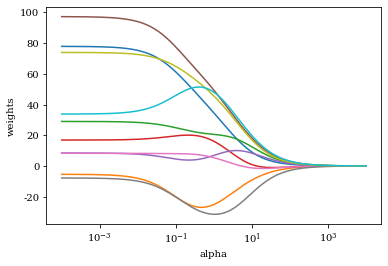

In [35]:
#　正则化对权重的影响（l1, l2, elastic net）
# 这里用到的是L2
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
# 注意　当坐标使用对数比例后，这里需要改为英文字体，否则无法正常显示
plt.rcParams['font.family'] = 'serif'

# 创建回归数据集
# nn_samples: 样本数量
# n_features: 特征数量
# coef: 是否返回权重，默认为Ｆａｌｓｅ
# random_state：随机种子
# bias: 偏置
X, y, w = make_regression(
    n_samples=10, n_features=10, 
    coef=True, random_state=1, bias=3.5
)

alphas = np.logspace(-4, 4, 200)
# 定义列表，用来保存在不同 alpha 取值下，模型最优的权重(w)值.
coefs = []
# 创建令回归对象
ridge = Ridge()
for a in alphas:
    # alpha: 惩罚力度，值越大，惩罚力度越大
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    # 将每个alpha 取值下，Ridge 回归拟合最佳解(w) 加入到列表中
    coefs.append(ridge.coef_)

# gca get current axes 获取当前的绘图对象
ax = plt.gca()
# 当ｙ是　二维数组时，　每一列会认为是一个单独的数据集
ax.plot(alphas, coefs)
# 设置x轴的比例。(对数比例)
ax.set_xscale('log')
# 设置ｘ轴的标签
ax.set_xlabel('alpha')
# 设置ｙ轴的标签
ax.set_ylabel('weights')

In [39]:
#　通过Lasso 实现特征选择
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

X, y =load_boston(return_X_y=True)
steps = [("ss", StandardScaler()), ("lasso", Lasso(alpha=5))]
pipe = Pipeline(steps=steps)
pipe.fit(X, y)
lasso = pipe.named_steps['lasso']
print(lasso.coef_)

[-0.          0.         -0.          0.         -0.          0.47793742
 -0.          0.         -0.         -0.         -0.          0.
 -1.4842917 ]


In [41]:
from sklearn.feature_selection import SelectFromModel
# estimator: 评估器，即SelectFromModel类要进行特征选择的模型
# threshold： 阀值，当特征权重小于阀值时，丢弃该特征
# prefit: 传入的评估器　(estimator参数)是否已经训练过了，默认为False
sfm = SelectFromModel(estimator=lasso, threshold=1e-5, prefit=True)
X_transform = sfm.transform(X)
print(X_transform[:3])
# 返回布尔数组，用来表示是否选择对应的特征，True为选择，False 为丢弃
print(sfm.get_support())

[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]]
[False False False False False  True False False False False False False
  True]


[ 2.07076213e+04 -4.97845133e+05  6.76438681e+06 -5.85847148e+07
  3.45658675e+08 -1.44781327e+09  4.41821283e+09 -9.97133430e+09
  1.67393392e+10 -2.08335434e+10  1.89564108e+10 -1.22496653e+10
  5.32327441e+09 -1.39469740e+09  1.66455590e+08]
[-2.28050995 -0.          0.          0.          0.          0.
  1.37135264  0.          0.          0.          0.          0.
  0.          0.          0.        ]
[-3.54177497 -0.98692712  0.47117231  0.99378303  1.03351056  0.86683848
  0.63550359  0.40472689  0.20025764  0.02892467 -0.11067832 -0.22293056
 -0.31276194 -0.38465655 -0.4423375 ]
[-1.86165016 -0.2996501  -0.          0.          0.01961693  0.20690235
  0.27988858  0.28810391  0.26055212  0.21407932  0.15841395  0.09914914
  0.0394854   0.          0.        ]


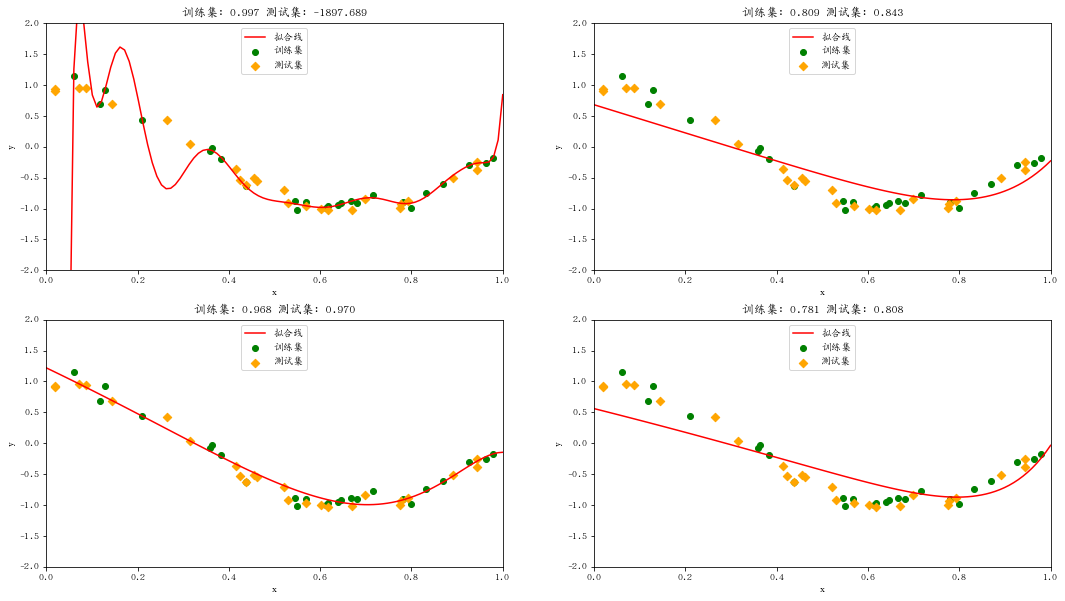

In [47]:
# 解决过拟合
from sklearn.linear_model import ElasticNet
plt.rcParams['font.family'] = 'AR PL UKai CN'
np.random.seed(0)
x = np.random.rand(50)
y = true_fun(x) + np.random.randn(len(x)) * 0.1
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
models = [
    ("线性回归(无正则化)", LinearRegression()),
    ("L1正则化:", Lasso(alpha=0.02)),
    ("L2正则化:", Ridge(alpha=0.02)),
    ("弹性网络:", ElasticNet(alpha=0.02, l1_ratio=0.5))
]
plt.figure(figsize=(18, 10))
for i, (name, model) in enumerate(models):
    plt.subplot(2, 2, i+1)
    pipe = Pipeline([
        ("poly", PolynomialFeatures(degree=15, include_bias=False)),
        ("model", model)
    ])
    fit_and_plot(pipe)
    print(model.coef_)

L1正则化: 0.001
L2正则化: 0.05
弹性网络: 0.001


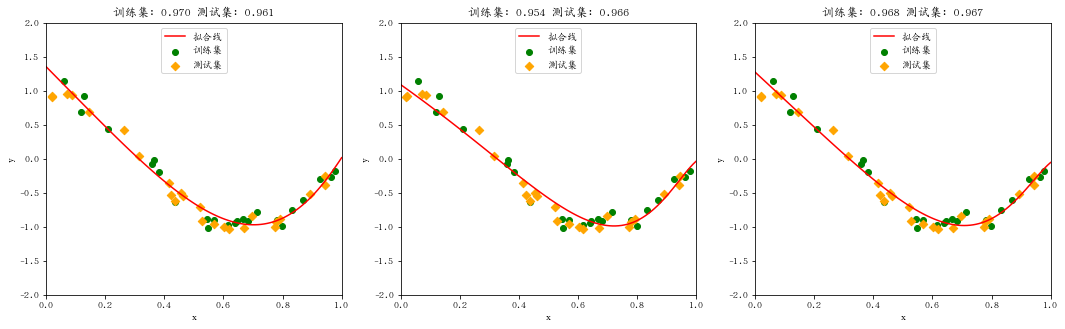

In [52]:
# 交叉验证调整超参数
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
models = [
    ("L1正则化:", LassoCV(max_iter=5000)),
    ("L2正则化:", RidgeCV()),
    ("弹性网络:", ElasticNetCV(l1_ratio=0.5))
]
plt.figure(figsize=(18, 5))
for i, (name, model) in enumerate(models):
    plt.subplot(1, 3, i+1)
    pipe = Pipeline([("poly", PolynomialFeatures(degree=15)), ("model", model)])
    # 将模型设置为10折交叉验证，其实在model中，各个模型的构造器中，可以指定cv=10, 但是需要三个都指定
    # 这里在循环中，　只需要使用一行代码就可以了
    pipe.set_params(model__cv=10)
    pipe.set_params(model__alphas=alphas)
    fit_and_plot(pipe)
    # 输出最佳的参数alpha
    print(name, model.alpha_)